In [4]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import loadmat
from scipy.cluster.vq import kmeans
from scipy.signal import find_peaks
%matplotlib inline


### Getting Started

To get started, type the following commands on the terminal:

Create a new directory for the tutorial, which will contain all tutorial materials
```
mkdir ‘IQ_BIO_WORKSHOP’
cd IQ_BIO_WORKSHOP
```

Clone Dr. Mark Kramer's repository, containing the data for this tutorial (and other data used in his book!)

```
git clone https://github.com/Mark-Kramer/Case-Studies-Kramer-Eden.git
```
```
cd ../
```

Clone the repository containing this tutorial's materials, which includes helper functions and workshop problems
```
git clone https://github.com/josefinacmenendez/IQ_BIO_Workshop_2019.git

cd IQ_BIO_Workshop_2019
```


### Building Models of Spike Train Data

### Data: Spontaneous firing activity of a retinal ganglion cell in cuture, exposed to low-light and high-light  environments

### Aims: 

* To visualize spike-train data
* To compute and interpret summary statistics
* To build models of the inter-spike-interval distribution as a function of the light level

In [2]:
ls ../Case-Studies-Kramer-Eden/Chapter9/

 Ch9-spikes-1.mat   Ch9-spikes-2.mat   Chapter_9.m  'Chapter 9 Solutions'/


In [56]:
retinal_ganglion_path = '../Case-Studies-Kramer-Eden/Chapter8/Ch8-spikes-1.mat'
retinal_ganglion_spks = loadmat(retinal_ganglion_path)

retinal_ganglion_spks['SpikesLow']
data_keys = list(retinal_ganglion_spks.keys())
data_names= [i for i in data_keys if '_' not in i]
data_dict = {}
for field_name in data_names:
    data_dict[field_name] = retinal_ganglion_spks[field_name]

In [2]:
#utils.py
def load_mat_file(path):
    matlab_struct = loadmat(path)
    data_keys = list(matlab_struct.keys())
    data_names= [i for i in data_keys if '_' not in i]
    data_dict = {}
    for field_name in data_names:
        data_dict[field_name] = matlab_struct[field_name]
    return data_dict

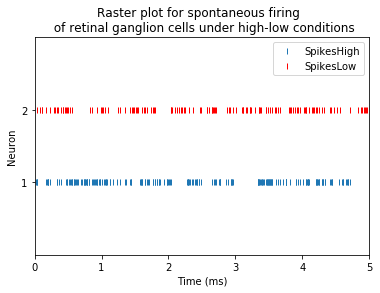

In [106]:
N_spikes_low = np.shape(data_dict['SpikesHigh'])[1]
N_spikes_high= np.shape(data_dict['SpikesLow'])[1]
y_vals_low   = np.ones((1,N_spikes_low))
y_vals_high  = np.ones((1,N_spikes_high))*2
low_spikes   = data_dict['SpikesHigh']
high_spikes  = data_dict['SpikesLow']
plt.plot(low_spikes.T,y_vals_low.T,'|')
plt.plot(high_spikes.T, y_vals_high.T, 'r|')
plt.yticks(np.arange(1,3))
plt.ylim([0,3])
plt.xlim([0, 5])
plt.ylabel('Neuron')
plt.xlabel('Time (s)')
plt.title('Raster plot for spontaneous firing  \n of retinal ganglion cells under high-low conditions')
plt.legend(['SpikesHigh','SpikesLow'])
plt.show()

In [114]:
spikes_diff = []
for i in range(N_spikes_low-1):
    low_ISI = low_spikes[0][i+1] - low_spikes[0][i]
    spikes_diff.append(low_ISI)
    

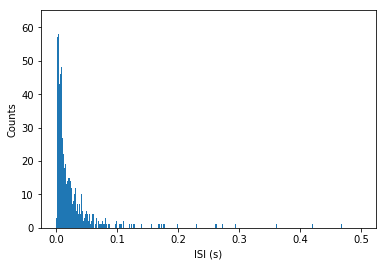

In [129]:
bins = np.arange(0,0.5,0.001)
plt.hist(spikes_diff,bins)
plt.ylabel('Counts')
plt.xlabel('ISI (s)')
plt.show()

In [3]:
ls ../Case-Studies-Kramer-Eden/Chapter9/

 Ch9-spikes-1.mat   Ch9-spikes-2.mat   Chapter_9.m  'Chapter 9 Solutions'/


In [3]:
place_cell_data_path = '../Case-Studies-Kramer-Eden/Chapter9/Ch9-spikes-1.mat'
place_cell_dict = load_mat_file(place_cell_data_path)
print(place_cell_dict.keys())

dict_keys(['t', 'X', 'spiketimes'])


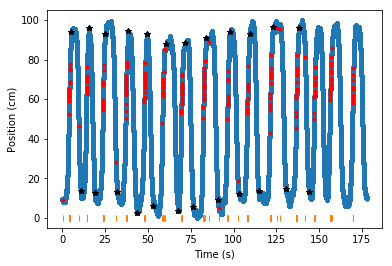

In [103]:
N_spikes = place_cell_dict['spiketimes'].size
y_vals   = np.zeros(N_spikes)

spike_time_pos_idx = [np.where(place_cell_dict['t']==spike_time)[0][0] for spike_time in place_cell_dict['spiketimes']]
spike_time_pos     = place_cell_dict['X'][spike_time_pos_idx]

plt.plot(place_cell_dict['t'],place_cell_dict['X'],'.')
plt.plot(place_cell_dict['t'][trial_idxs],place_cell_dict['X'][trial_idxs],'*k')

plt.plot(place_cell_dict['spiketimes'],y_vals,'|')
plt.plot(place_cell_dict['spiketimes'],spike_time_pos,'.r')

plt.xlabel('Time (s)')
plt.ylabel('Position (cm)')

plt.show()

In [107]:
print(tmp_peaks_down)
print(tmp_peaks_up)
print(peaks_up[-20:-1])

[144135 144419 145026 145395]
[148572]
[150215 150686 157904 158536 158985 159186 159584 159901 160233 160557
 170938 171321 171495 171934 172263 172524 172806 172979 173244]


In [187]:
peaks_up, _    = find_peaks(place_cell_dict['X'].T[0],88) #parameters chosen by visual inspection
peaks_down,_   = find_peaks(place_cell_dict['X'].T[0]*-1,-11) #parameters chosen by visual inspection

trial_idxs     = []
tmp_peaks_up   = np.copy(peaks_up)
tmp_peaks_down = np.copy(peaks_down)
curr_peak      = tmp_peaks_down[0]
next_peak      = tmp_peaks_up[0]

trial_idxs.append(curr_peak)
trial_idxs.append(next_peak)

condition1 = len(np.where(tmp_peaks_up   > curr_peak)[0]) > 0
condition2 = len(np.where(tmp_peaks_down > next_peak)[0]) > 0
condition  = condition1 and condition2

while condition:

    next_peak_up_idx  = np.where(tmp_peaks_up > curr_peak)[0][0]
    next_peak_up      = tmp_peaks_up[next_peak_up_idx]
    tmp_peaks_up      = tmp_peaks_up[next_peak_up_idx:-1]
    
    next_peak_down_idx= np.where(tmp_peaks_down > next_peak_up)[0][0]
    next_peak_down    = tmp_peaks_down[next_peak_down_idx]
    tmp_peaks_down    = tmp_peaks_down[next_peak_down_idx:-1]
    
    trial_idxs.append(next_peak_up)
    trial_idxs.append(next_peak_down)
    
    curr_peak  = next_peak_down
    
    condition1 = len(np.where(tmp_peaks_up   > curr_peak)[0]) > 0
    condition2 = len(np.where(tmp_peaks_down > next_peak_up)[0]) > 0
    condition  = condition1 and condition2
    
trial_idxs.append(peaks_up[-1])
trial_idxs.append(peaks_down[-1])

N_trials      = len(trial_idxs)
start_idxs    = trial_idxs[1:N_trials:2]
start_idxs[0] = 0
start_idxs[-1]= trial_idxs[-1]


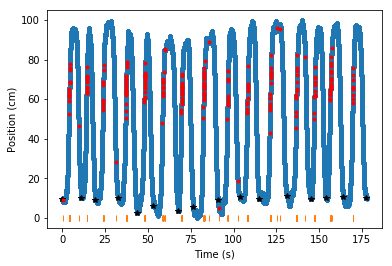

In [188]:
N_spikes = place_cell_dict['spiketimes'].size
y_vals   = np.zeros(N_spikes)

spike_time_pos_idx = [np.where(place_cell_dict['t']==spike_time)[0][0] for spike_time in place_cell_dict['spiketimes']]
spike_time_pos     = place_cell_dict['X'][spike_time_pos_idx]

plt.plot(place_cell_dict['t'],place_cell_dict['X'],'.')
plt.plot(place_cell_dict['t'][start_idxs],place_cell_dict['X'][start_idxs],'*k')

plt.plot(place_cell_dict['spiketimes'],y_vals,'|')
plt.plot(place_cell_dict['spiketimes'],spike_time_pos,'.r')

plt.xlabel('Time (s)')
plt.ylabel('Position (cm)')

plt.show()

In [210]:
by_trial_dict = {}
by_trial_dict['X']=[]
by_trial_dict['t']=[]
by_trial_dict['spiketimes']=[]
for t in range(len(start_idxs)-1):
    t_start = start_idxs[t]
    t_end   = start_idxs[t+1]-1
    by_trial_dict['X'].append(place_cell_dict['X'].T[0][t_start:t_end])
    by_trial_dict['t'].append(place_cell_dict['t'].T[0][t_start:t_end])
    curr_spike_times   = [i for i in place_cell_dict['spiketimes'].T[0] if i in by_trial_dict['t'][t]]
    by_trial_dict['spiketimes'].append(curr_spike_times)

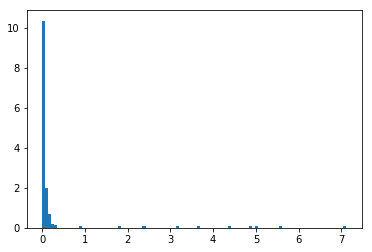

In [233]:
all_inter_spike_intervals = []
for t in range(len(by_trial_dict['spiketimes'])):
    #plt.plot(by_trial_dict['t'][t], by_trial_dict['X'][t])
    curr_spike_times = by_trial_dict['spiketimes'][t]
    all_inter_spike_intervals.append(np.diff(curr_spike_times))
flatten = lambda l: [item for sublist in l for item in sublist]
ISIs = flatten(all_inter_spike_intervals)
plt.hist(ISIs,density=True, bins=100)
plt.show()

In [209]:
place_cell_dict['spiketimes'].T[0]

array([  0.236,   3.902,   4.033,   4.088,   4.115,   4.116,   4.155,
         4.193,   4.297,   4.326,   4.328,   4.499,   4.518,   4.577,
         9.589,  14.163,  14.168,  14.184,  14.226,  14.239,  14.304,
        14.329,  14.347,  14.359,  14.362,  14.375,  14.524,  23.698,
        23.736,  23.768,  23.801,  23.807,  23.964,  24.016,  24.017,
        24.148,  24.195,  31.31 ,  36.982,  37.051,  37.141,  37.245,
        37.249,  37.262,  37.281,  37.291,  37.298,  37.327,  37.351,
        37.377,  37.413,  37.425,  37.471,  37.473,  37.564,  37.673,
        37.751,  47.976,  48.012,  48.035,  48.09 ,  48.134,  48.143,
        48.17 ,  48.203,  48.249,  48.261,  48.271,  48.279,  48.297,
        48.305,  48.339,  48.56 ,  58.447,  58.747,  58.765,  58.78 ,
        58.859,  58.883,  58.949,  58.963,  58.973,  58.998,  59.134,
        60.056,  60.234,  69.505,  69.539,  69.629,  69.671,  69.721,
        69.77 ,  69.771,  69.783,  69.832,  69.862,  69.897,  69.9  ,
        69.91 ,  69.

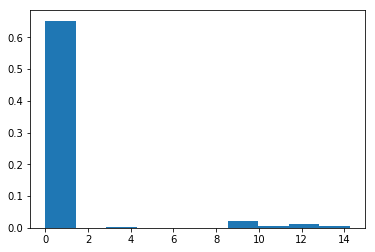

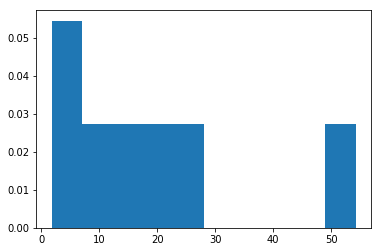

In [136]:
going_up_idxs   = np.where(np.diff(place_cell_dict['X'].T[0])>0)
going_down_idxs = np.where(np.diff(place_cell_dict['X'].T[0])<0)

going_up_times  = place_cell_dict['t'].T[0][going_up_idxs]
going_down_times= place_cell_dict['t'].T[0][going_down_idxs]
going_up_spike_times = [i for i in place_cell_dict['spiketimes'].T[0] if i in going_up_times]
going_down_spike_times = [i for i in place_cell_dict['spiketimes'].T[0] if i in going_down_times]
going_up_ISIs = np.diff(going_up_spike_times)
going_down_ISIs = np.diff(going_down_spike_times)
plt.hist(going_up_ISIs,density=True)
plt.show()
plt.hist(going_down_ISIs,density=True)
plt.show()

In [65]:
going_up_spikes = place_cell_dict['spiketimes'].T[0][going_up_idxs]
going_down_spikes=place_cell_dict['spiketimes'].T[0][going_down_idxs]

IndexError: index 220 is out of bounds for axis 0 with size 220

In [75]:
a = place_cell_dict['spiketimes'].T[0]
going_up_idxs[0].shape

(88932,)

In [ ]:
spike_time_pos_idx = [np.where(place_cell_dict['t']==spike_time)[0][0] for spike_time in place_cell_dict['spiketimes']]
#find spike times corresponding to the upward trajectory
